In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('medical_examination.csv', index_col=0, sep=',')

In [5]:
print(df.head())
print(df.columns)

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  
Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [6]:
#first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
#If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

df['overweight'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = np.where(df['overweight']>25, 1, 0) #if value over 25 return 1, else retun 0
print(df['overweight'])

id
0        0
1        1
2        0
3        1
4        0
        ..
99993    1
99995    1
99996    1
99998    1
99999    0
Name: overweight, Length: 70000, dtype: int64


In [7]:
# Normalize data by making 0 always good and 1 always bad. 
#If the value of 'cholestorol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1.
df['cholesterol'] = np.where(df['cholesterol']==1, 0, 1)
df['gluc'] = np.where(df['gluc']==1, 0, 1)
print(df.head())

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            0     0      0   
1   20228       1     156    85.0    140     90            1     0      0   
2   18857       1     165    64.0    130     70            1     0      0   
3   17623       2     169    82.0    150    100            0     0      0   
4   17474       1     156    56.0    100     60            0     0      0   

    alco  active  cardio  overweight  
id                                    
0      0       1       0           0  
1      0       1       1           1  
2      0       0       1           0  
3      0       1       1           1  
4      0       0       0           0  


In [8]:
    # Create DataFrame for cat plot using `pd.melt` using just the values from
    #'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    # age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke alco  active  cardio  overweight
  
    df_cat = df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
    print(df_cat)

        cardio     variable  value
0            0  cholesterol      0
1            1  cholesterol      1
2            1  cholesterol      1
3            1  cholesterol      0
4            0  cholesterol      0
...        ...          ...    ...
419995       0   overweight      1
419996       1   overweight      1
419997       1   overweight      1
419998       1   overweight      1
419999       0   overweight      0

[420000 rows x 3 columns]


In [24]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat['total'] = 0
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
#df_cat = df_cat.groupby(['cardio', 'variable']).count()
print(df_cat.head(3))
print(df_cat.tail(3))

   cardio variable  value  total
0       0   active      0   6378
1       0   active      1  28643
2       0     alco      0  33080
    cardio    variable  value  total
21       1  overweight      1  24440
22       1       smoke      0  32050
23       1       smoke      1   2929


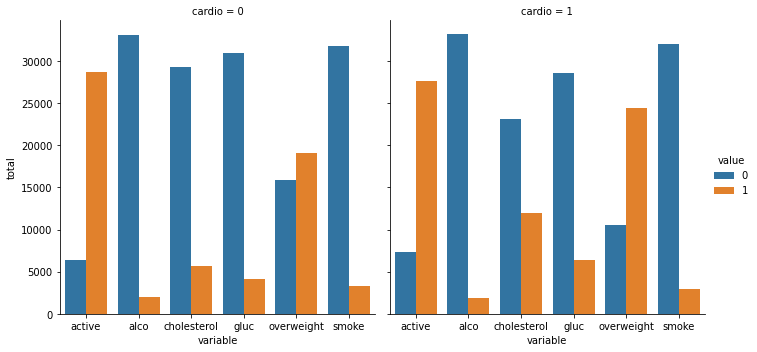

In [10]:
#(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, 
#estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, 
#seed=None, order=None, hue_order=None, row_order=None, col_order=None, 
#kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, 
#legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

#g = sns.FacetGrid(df_cat, col="cardio")
#g.map(sns.catplot, data=df_cat, x="variable", y="total", col="cardio", orient="v")
#g.map(data=df_cat, row="variable", col="total", kind="bar")
sns.catplot(
    data=df_cat, 
    x="variable", 
    y="total", 
    col="cardio",
    hue="value",
    kind="bar",
    legend_out=True,
)

In [11]:
#print(df[df['cardio'] == 1])
cardio_0 = df[df['cardio'] == 0]
print('ch 0', cardio_0['cholesterol'].sum(), cardio_0['cholesterol'].isin([0]).sum(), len(cardio_0))
cardio_0_sums_1 = [cardio_0['cholesterol'].sum(), cardio_0['gluc'].sum(), cardio_0['smoke'].sum(), cardio_0['alco'].sum(), cardio_0['active'].sum(), cardio_0['overweight'].sum()]
cardio_0_sums_0 = [
    cardio_0['cholesterol'].isin([0]).sum(),
    cardio_0['gluc'].isin([0]).sum(),
    cardio_0['smoke'].isin([0]).sum(),
    cardio_0['alco'].isin([0]).sum(),
    cardio_0['active'].isin([0]).sum(),
    cardio_0['overweight'].isin([0]).sum()]

#cardio_0_reduced = cardio_0[cardio_0['cholesterol','gluc','smoke','alco','active','overweight']]
sumTable = pd.DataFrame([cardio_0_sums_1, cardio_0_sums_0] ,columns=['cholesterol','gluc','smoke','alco','active','overweight'])
print(sumTable)

ch 0 5691 29330 35021
   cholesterol   gluc  smoke   alco  active  overweight
0         5691   4127   3240   1941   28643       19106
1        29330  30894  31781  33080    6378       15915


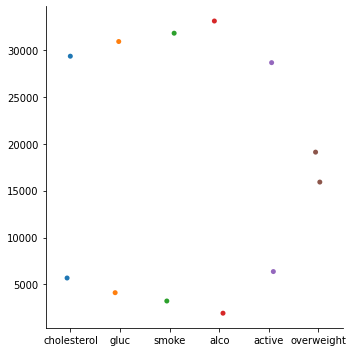

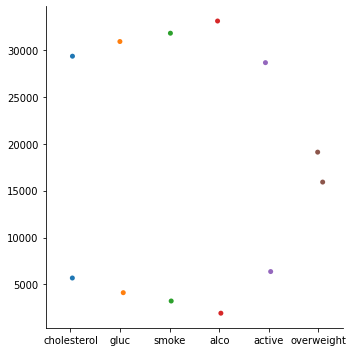

In [12]:
sns.catplot(data=sumTable)
sns.catplot(data=sumTable);

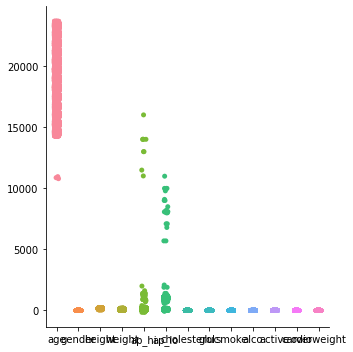

In [13]:
sns.catplot(data=df)

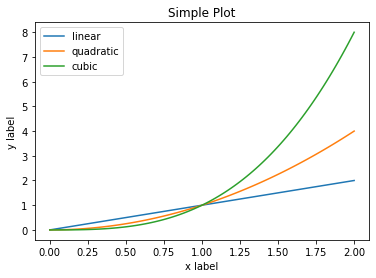

In [14]:
x = np.linspace(0, 2, 100) #makes like a fake array from 0 - 2 with 100 points between

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [15]:
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
0      18393       2     168    62.0    110     80            0     0      0   
1      20228       1     156    85.0    140     90            1     0      0   
2      18857       1     165    64.0    130     70            1     0      0   
3      17623       2     169    82.0    150    100            0     0      0   
4      17474       1     156    56.0    100     60            0     0      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
99993  19240       2     168    76.0    120     80            0     0      1   
99995  22601       1     158   126.0    140     90            1     1      0   
99996  19066       2     183   105.0    180     90            1     0      0   
99998  22431       1     163    72.0    135     80            0     1      0   
99999  20540       1     170    72.0    

In [16]:
heightCap = np.percentile(df['height'], 97.5)
weightMin = np.percentile(df['weight'], 2.5)
weightMax = np.percentile(df['weight'], 97.5)
#print(heightCap, weightMin, weightMax)
df_heat = df.copy()
df_heat = df_heat[((df_heat['ap_lo'] <= df_heat['ap_hi']) & (df_heat['height'] >= df_heat['height'].quantile(0.025)))]
print(len(df_heat))
df_heat = df_heat[(df_heat['height'] < heightCap)]
print(len(df_heat))
df_heat = df_heat[((df_heat['weight'] > weightMin) & (df_heat['weight'] < weightMax))]
print(len(df_heat))
#print(df.info)

67260
65000
62087


In [17]:
#print(df_heat)
#df_heat['id'] = df_heat['id']
df_heat['id'] = range(len(df_heat)) 
#print(df_heat)
#print(df_heat.columns.tolist())
df_heat= df_heat[['id','age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']]
print(df_heat)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
id                                                                             
0          0  18393       2     168    62.0    110     80            0     0   
1          1  20228       1     156    85.0    140     90            1     0   
2          2  18857       1     165    64.0    130     70            1     0   
3          3  17623       2     169    82.0    150    100            0     0   
4          4  17474       1     156    56.0    100     60            0     0   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
99991  62082  19699       1     172    70.0    130     90            0     0   
99992  62083  21074       1     165    80.0    150     80            0     0   
99993  62084  19240       2     168    76.0    120     80            0     0   
99998  62085  22431       1     163    72.0    135     80            0     1   
99999  62086  20540       1     170    7

In [18]:
#df_heat = pd.melt(df_heat, value_vars=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])
#print(df_heat)

In [19]:
corr = df_heat.corr(method="spearman")
corr = round(corr, 1)
corr = corr.astype('float')
print(corr)

              id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
id           1.0  0.0     0.0     0.0     0.0    0.0    0.0          0.0   
age          0.0  1.0    -0.0    -0.1     0.1    0.2    0.2          0.1   
gender       0.0 -0.0     1.0     0.5     0.1    0.1    0.1         -0.0   
height       0.0 -0.1     0.5     1.0     0.2    0.0    0.0         -0.1   
weight       0.0  0.1     0.1     0.2     1.0    0.3    0.2          0.1   
ap_hi        0.0  0.2     0.1     0.0     0.3    1.0    0.7          0.2   
ap_lo        0.0  0.2     0.1     0.0     0.2    0.7    1.0          0.2   
cholesterol  0.0  0.1    -0.0    -0.1     0.1    0.2    0.2          1.0   
gluc         0.0  0.1    -0.0    -0.0     0.1    0.1    0.1          0.4   
smoke       -0.0 -0.0     0.3     0.2     0.1    0.0    0.0          0.0   
alco        -0.0 -0.0     0.2     0.1     0.1    0.0    0.0          0.0   
active       0.0 -0.0     0.0    -0.0    -0.0    0.0    0.0          0.0   
cardio      

In [20]:
#from documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


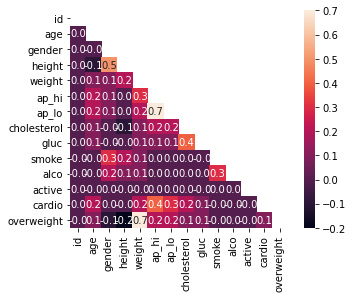

In [21]:
sns.heatmap(corr, square=True, mask=mask, annot=True, fmt='.1f')